# Histogramas en python:

In [1]:
x = (0,1,1,1,2,2,3,7,7,7,25) 
x

(0, 1, 1, 1, 2, 2, 3, 7, 7, 7, 25)

In [2]:
def count_elements(seq) -> dict:
    """
    Funcion que cuenta las frecuencias de aparicion
    de cada elemento de la secuencia, creando un 
    diccionario como si fuese una tabla de frecuencias    
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0) + 1
    return hist

In [3]:
fAbs = count_elements(x)
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [4]:
from collections import Counter
fAbs2 = Counter(x)
fAbs2

Counter({1: 3, 7: 3, 2: 2, 0: 1, 3: 1, 25: 1})

In [5]:
fAbs.items() == fAbs2.items()

True

In [12]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocando en horizontal y con caracteres ASCII
    """

    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

asii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [11]:
import random
random.seed(2019)

vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

data = []
for k, v in zip(vals, freqs):
    data.extend([k]*v)
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [13]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


## Histogramas con Numpy

In [14]:
import numpy as np

np.random.seed(2019)
np.set_printoptions(precision=3) #numeros decimales con 3 digitos de precision

In [15]:
x = np.random.laplace(loc = 10, scale = 3, size=1000)
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [16]:
hist, bin_edges = np.histogram(x)
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [17]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [18]:
hist.size, bin_edges.size # 10 divisiones

(10, 11)

In [20]:
min_edge = x.min()
max_edge = x.max()

n_bins = 10
bin_edges = np.linspace(start=min_edge, stop=max_edge, num= n_bins+1, endpoint=True)
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [23]:
x1 = (0,1,1,1,2,2,3,7,7,7,25)  
bcount = np.bincount(x1)
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [26]:
hist, _ = np.histogram(x1, range=(0, max(x1)), bins = max(x1)+1)
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [27]:
np.array_equal(bcount, hist)

True

In [29]:
n = dict(zip(np.unique(x1), bcount[bcount.nonzero()]))
n

{np.int64(0): np.int64(1),
 np.int64(1): np.int64(3),
 np.int64(2): np.int64(2),
 np.int64(3): np.int64(1),
 np.int64(7): np.int64(3),
 np.int64(25): np.int64(1)}

## Histogramas con matplotlib y pandas:

In [32]:
import matplotlib.pyplot as plt
np.random.seed(2019)
x = np.random.laplace(loc = 10, scale = 3, size=1000)
x

array([ 1.493e+01,  9.278e+00,  1.085e+01,  1.097e+01,  1.429e+01,
        8.459e+00,  1.155e+01,  1.493e+01,  1.432e+01,  9.373e+00,
        9.700e+00,  8.119e+00,  6.635e+00,  1.452e+01,  6.357e+00,
        2.046e+01,  1.787e+00,  1.009e+01,  7.268e+00,  1.444e+01,
        1.008e+01,  1.051e+01,  8.460e+00,  1.337e+01,  1.016e+01,
        5.314e+00,  8.240e+00,  2.881e+00,  1.005e+01,  9.830e+00,
        1.497e+01,  1.654e+01,  1.157e+01,  1.354e+01,  1.581e+01,
        1.305e+01,  1.352e+01,  1.262e+01,  6.781e+00,  8.366e+00,
        8.512e+00,  6.341e+00,  1.048e+01,  1.390e+01,  8.692e+00,
        8.214e+00,  1.136e+01,  7.119e+00,  1.053e+01,  1.387e+01,
        7.729e+00,  8.364e+00,  9.199e+00,  8.927e+00,  8.742e+00,
        1.637e+01,  2.271e+00,  1.242e+01,  9.213e+00,  1.170e+01,
        9.700e+00,  1.152e+01,  8.961e+00,  1.266e+01,  8.439e+00,
        7.928e+00,  1.365e+01,  1.299e+01,  9.577e+00,  1.225e+01,
        8.750e+00,  7.437e+00,  9.490e+00,  1.035e+01,  1.493e

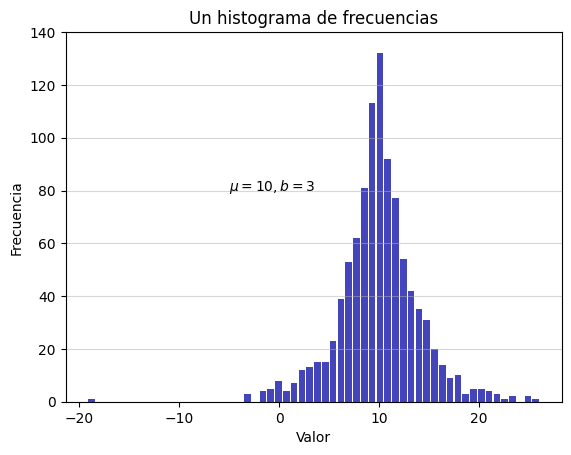

In [40]:
n, bins, patches = plt.hist(x = x, bins = "auto", color = "#0505a5", alpha = 0.75, rwidth = 0.85)
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histograma de frecuencias")
plt.text(-5, 80, r'$\mu = 10, b = 3$')
maxfreq = n.max()
plt.ylim(ymax = np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10)
plt.show()


In [37]:
n # contiene las frecuencias de las divisiones

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [38]:
bins # los extremos de las divisioens

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [41]:
patches #numero de divisiones

<BarContainer object of 58 artists>

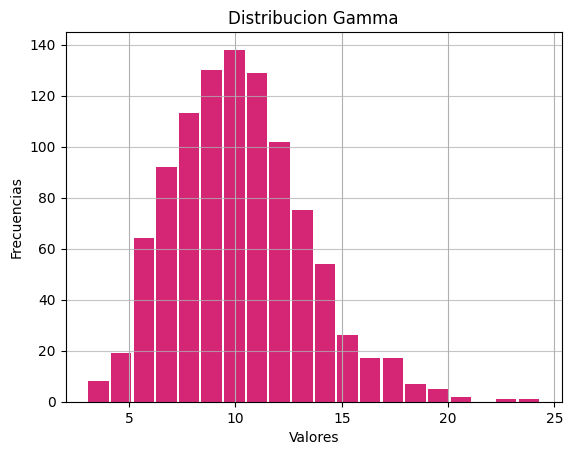

In [44]:
import pandas as pd
size, scale = 1000, 10

data = pd.Series(np.random.gamma(scale, size=size))
data.plot.hist(grid = True, bins = 20, rwidth = 0.9, color = "#d52675")
plt.title("Distribucion Gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis="y", alpha= 0.75)
plt.show()

## Funciones de densidad y de probabilidad:

In [46]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc=mu, scale= sigma, size = (1000, 2)), columns=['x1','x2'])
dist

,x1,x2
0,12.525035,19.626134
1,3.061196,18.059625
2,5.768095,22.258458
3,7.296967,18.900298
4,18.675304,16.073901
...,...,...
995,12.240065,17.309076
996,0.348066,19.507468
997,6.748116,23.168631
998,10.913992,19.395874


In [47]:
dist.agg(['min','max', 'mean', 'std']).round(decimals=2)

,x1,x2
min,-8.68,12.22
max,26.69,26.47
mean,10.00,20.03
std,4.97,2.09


In [50]:
#pip install  scipy

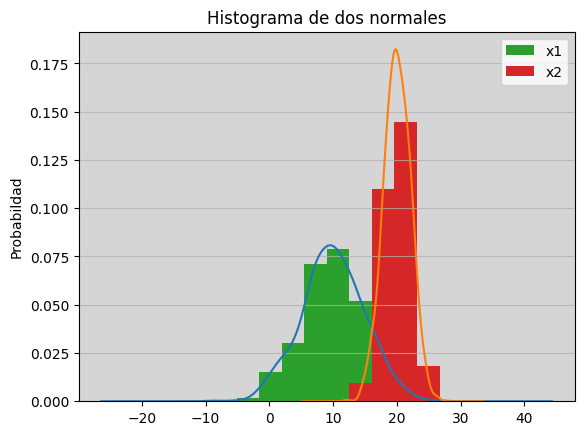

In [53]:
fig, ax = plt.subplots()
dist.plot.kde(ax = ax, legend = False, title = "Histograma de dos normales")
dist.plot.hist(density = True, ax = ax)
ax.set_ylabel("Probabildad")
ax.grid(axis='y', alpha = 0.75)
ax.set_facecolor("#d5d5d5")

In [54]:
from scipy import stats

dist = stats.norm() #distribucion normal teorica N(0,1) ~ exp(-x**2/2)/sqrt(2*pi)
dist

In [55]:
sample = dist.rvs(size = 1000) #muestra
sample

array([-3.874e-01, -3.711e-01, -8.935e-01, -6.280e-02,  1.264e+00,
        1.022e+00,  7.151e-01, -7.919e-01, -3.190e-01, -1.088e+00,
       -5.137e-01, -2.259e-01,  2.025e+00, -3.530e-01, -2.236e-01,
        2.169e-01,  1.545e+00,  3.879e-01, -7.451e-01, -2.978e-01,
       -5.442e-01, -5.173e-01, -4.831e-01,  1.732e+00,  1.977e+00,
        1.210e+00, -8.729e-01,  1.137e+00,  6.350e-01,  3.748e-01,
        2.777e-01, -5.906e-01,  1.894e+00,  1.750e+00,  1.675e+00,
        8.008e-01,  8.305e-01, -1.593e+00,  1.223e+00, -1.319e+00,
        2.161e+00, -2.326e+00,  5.067e-01, -7.890e-01,  1.099e+00,
       -4.419e-01, -3.552e-02,  1.586e+00, -3.283e-01,  1.054e+00,
       -7.236e-01,  1.062e-01, -1.052e-01, -1.819e+00,  6.786e-01,
        1.091e+00,  8.959e-01,  1.211e+00,  6.990e-01,  3.310e-01,
        2.037e-01,  8.404e-01,  7.145e-01,  7.344e-01,  3.666e-01,
       -1.373e+00,  3.843e-01, -4.008e-01, -2.584e-02,  4.579e-02,
        1.802e-01,  5.089e-01,  4.264e-01, -5.849e-02, -3.072e

In [56]:
x = np.linspace(start = stats.norm.ppf(0.01), stop= stats.norm.ppf(0.99), num=250)
x

array([-2.326, -2.308, -2.289, -2.27 , -2.252, -2.233, -2.214, -2.196,
       -2.177, -2.158, -2.139, -2.121, -2.102, -2.083, -2.065, -2.046,
       -2.027, -2.009, -1.99 , -1.971, -1.953, -1.934, -1.915, -1.897,
       -1.878, -1.859, -1.841, -1.822, -1.803, -1.784, -1.766, -1.747,
       -1.728, -1.71 , -1.691, -1.672, -1.654, -1.635, -1.616, -1.598,
       -1.579, -1.56 , -1.542, -1.523, -1.504, -1.485, -1.467, -1.448,
       -1.429, -1.411, -1.392, -1.373, -1.355, -1.336, -1.317, -1.299,
       -1.28 , -1.261, -1.243, -1.224, -1.205, -1.187, -1.168, -1.149,
       -1.13 , -1.112, -1.093, -1.074, -1.056, -1.037, -1.018, -1.   ,
       -0.981, -0.962, -0.944, -0.925, -0.906, -0.888, -0.869, -0.85 ,
       -0.832, -0.813, -0.794, -0.775, -0.757, -0.738, -0.719, -0.701,
       -0.682, -0.663, -0.645, -0.626, -0.607, -0.589, -0.57 , -0.551,
       -0.533, -0.514, -0.495, -0.476, -0.458, -0.439, -0.42 , -0.402,
       -0.383, -0.364, -0.346, -0.327, -0.308, -0.29 , -0.271, -0.252,
      

In [57]:
gkde = stats.gaussian_kde(dataset= sample)
gkde

Text(-2.0, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2\\pi}}$')

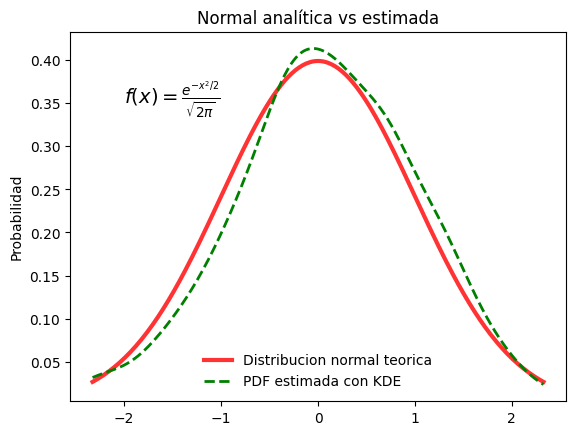

In [61]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c = "red", lw=3, alpha = 0.8, label = "Distribucion normal teorica")
ax.plot(x , gkde.evaluate(x), linestyle = "dashed", c= "green", lw =2, label = "PDF estimada con KDE")
ax.legend(loc = "best", frameon = False)
ax.set_title("Normal analítica vs estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2., 0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$', fontsize = 14)

## Histogramas con Seaborn

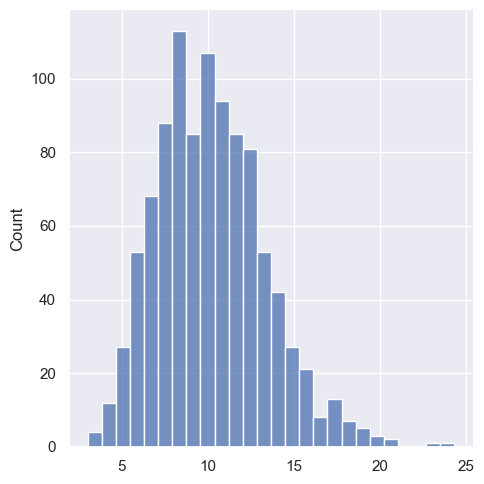

In [66]:
import seaborn as sns
%matplotlib inline 
sns.set()

sns.displot(data)

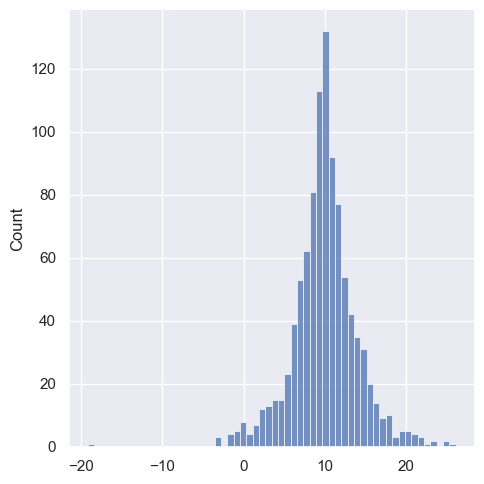

In [67]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3, size=1000)
sns.set_style("darkgrid")
sns.displot(x)

C:\Users\dg_su\AppData\Local\Temp\ipykernel_8604\929158429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=stats.laplace, kde=False)


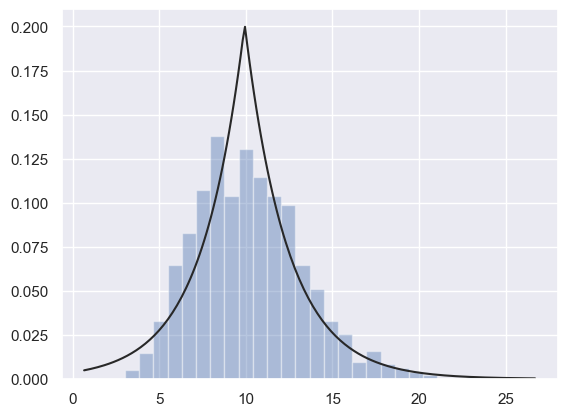

In [76]:
sns.distplot(data, fit=stats.laplace, kde=False)
plt.show()

### Otras formas:

In [81]:
data2 = np.random.choice(np.arange(10), size = 10000, p = np.linspace(1,11,10)/60)
s = pd.Series(data2)
s

0       2
1       7
2       5
3       4
4       9
       ..
9995    8
9996    8
9997    6
9998    5
9999    7
Length: 10000, dtype: int64

In [80]:
s.value_counts() # frecuencias absolutas:

9    1817
8    1650
7    1520
6    1288
5    1096
4     877
3     705
2     528
1     364
0     155
Name: count, dtype: int64

In [82]:
s.value_counts(normalize=True) # frecuencias relativas

9    0.1844
8    0.1632
7    0.1502
6    0.1301
5    0.1057
4    0.0870
3    0.0718
2    0.0527
1    0.0364
0    0.0185
Name: proportion, dtype: float64

In [84]:
age = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])
bins = (0,10,15,18,21, np.inf)
labels = ('infancia', 'preadolescencia', 'adolescencia', 'universitario', 'adulto')
groups = pd.cut(age, bins= bins, labels= labels)
groups

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12       adolescencia
13      universitario
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): ['infancia' < 'preadolescencia' < 'adolescencia' < 'universitario' < 'adulto']

In [85]:
groups.value_counts() # frecuencia absoluta

infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
Name: count, dtype: int64

In [86]:
groups.value_counts(normalize=True) #frecuencia relativa

infancia           0.421053
adulto             0.263158
adolescencia       0.157895
preadolescencia    0.105263
universitario      0.052632
Name: proportion, dtype: float64

In [90]:
pd.concat((age, groups),axis=1)

,0,1
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia


In [91]:
pd.concat((age, groups),axis=1).rename(columns={0:'age', 1:'group'})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia
